Text(0, 0.5, 'P(x)')

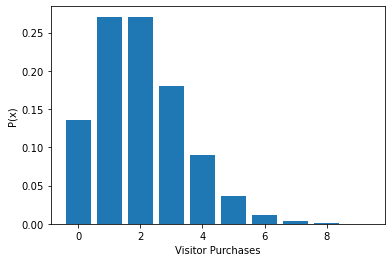

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats



##1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
##Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

##What is the probability that no cars drive up in the noon hour?
##What is the probability that 3 or more cars come through the drive through?
##How likely is it that the drive through gets at least 1 car?


λ = 2
drive_up = stats.poisson(λ)
x = np.arange(0,10)
y= drive_up.pmf(x)
plt.bar(x,y)
plt.xlabel('Visitor Purchases')
plt.ylabel('P(x)')

In [3]:
#1a What is the probability that no cars drive up in the noon hour?
drive_up.pmf(0)

0.1353352832366127

In [8]:
#1b.) What is the probability that 3 or more cars come through the drive through?
drive_up.sf(2)

0.32332358381693654

In [9]:
#1c. How likely is it that the drive through gets at least 1 car?

drive_up.sf(0)



0.8646647167633873

In [14]:
##Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3.
##Calculate the following:


#2a. What grade point average is required to be in the top 5% of the graduating class?

μ = 3.0

σ = .3


gpa = stats.norm(μ,σ)

top_5_percent = gpa.isf(.05)

top_5_percent



3.4934560880854417

In [16]:
#2b. What GPA constitutes the bottom 15% of the class?

bottom_15_percent = gpa.ppf(.15)
bottom_15_percent

2.689069983151863

In [ ]:
#2C. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
##Determine the range of the third decile. 
##Would a student with a 2.8 grade point average qualify for this scholarship?

